In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("Customer.csv")
print("Shape:", df.shape)
print("\nInfo:", df.info())
print("\nMissing values:", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape: (657, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     657 non-null    int64
 1   Age             657 non-null    int64
 2   Annual Income   657 non-null    int64
 3   Spending Score  657 non-null    int64
dtypes: int64(4)
memory usage: 20.7 KB

Info: None

Missing values: Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Duplicates: 0


In [2]:
print("\nSummary Stats:\n", df.describe())



Summary Stats:
         Customer ID         Age  Annual Income  Spending Score
count    657.000000  657.000000     657.000000      657.000000
mean   20329.000000   44.729072   82282.076104       50.292237
std      189.803846   15.189844   39788.299130       29.186320
min    20001.000000   18.000000   15126.000000        1.000000
25%    20165.000000   32.000000   48591.000000       26.000000
50%    20329.000000   45.000000   81203.000000       49.000000
75%    20493.000000   57.000000  117795.000000       76.000000
max    20657.000000   70.000000  149869.000000      100.000000


In [4]:
X = df[['Age', 'Annual Income', 'Spending Score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=['Age (scaled)', 'Annual Income (scaled)', 'Spending Score (scaled)'])

print("\n First 5 rows after Standard Scaling:")
print(scaled_df.head())



 First 5 rows after Standard Scaling:
   Age (scaled)  Annual Income (scaled)  Spending Score (scaled)
0      0.742570               -0.204212                 1.670127
1      1.599057               -0.386037                 0.332867
2      0.083733               -0.331608                -0.181464
3     -0.838637               -1.554305                 1.635839
4      1.006104                0.493433                -1.621591


C:\ProgramData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

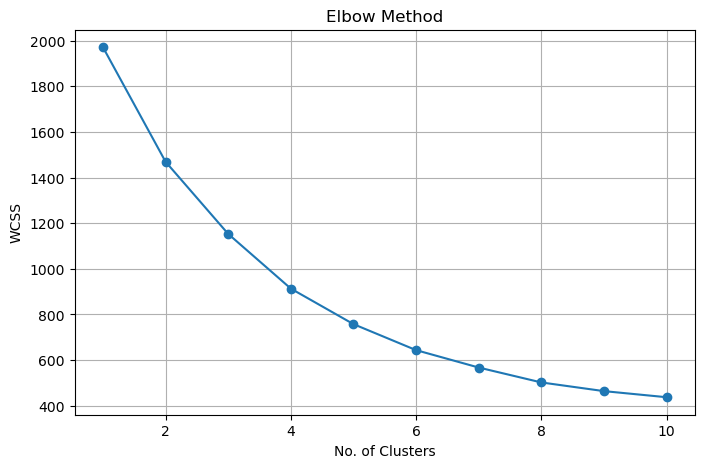

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [9]:
import os
import warnings

os.environ["OMP_NUM_THREADS"] = "3"

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

print("Silhouette Scores:")
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)  
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Clusters: {i} --> Silhouette Score: {score:.4f}")


Silhouette Scores:
Clusters: 2 --> Silhouette Score: 0.2458
Clusters: 3 --> Silhouette Score: 0.2498
Clusters: 4 --> Silhouette Score: 0.2674
Clusters: 5 --> Silhouette Score: 0.2772
Clusters: 6 --> Silhouette Score: 0.2865
Clusters: 7 --> Silhouette Score: 0.2788
Clusters: 8 --> Silhouette Score: 0.2723
Clusters: 9 --> Silhouette Score: 0.2813
Clusters: 10 --> Silhouette Score: 0.2683


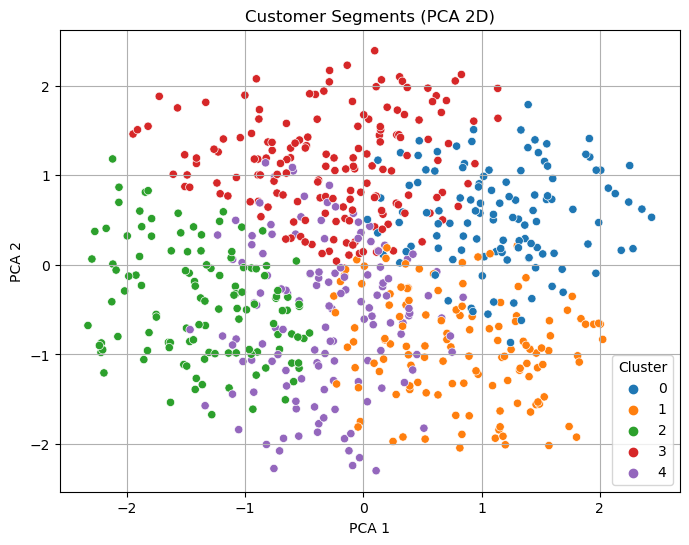

In [12]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='tab10')
plt.title("Customer Segments (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

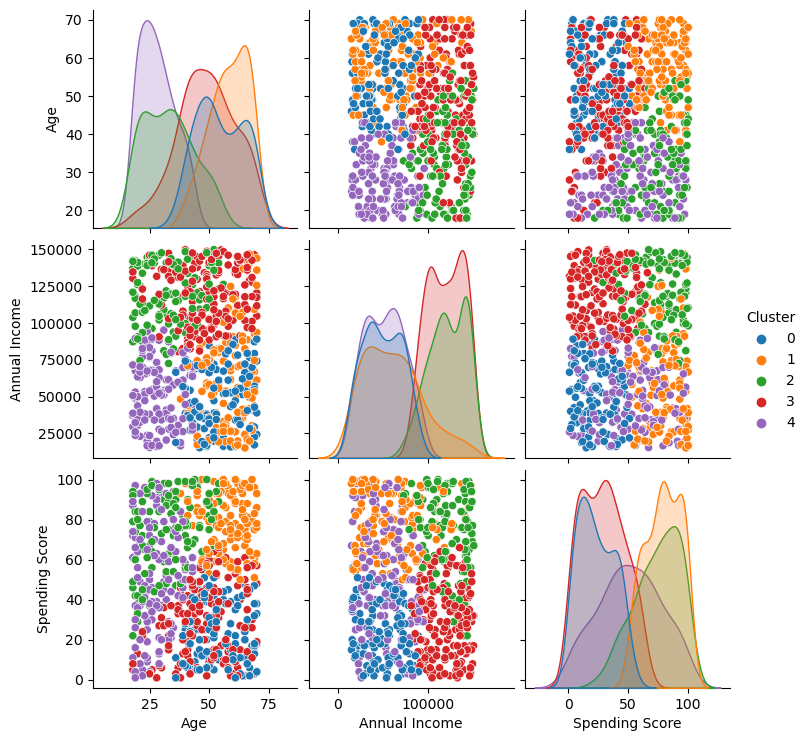

In [13]:
sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']], hue='Cluster', palette='tab10')
plt.show()

In [14]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                         columns=['Age', 'Annual Income', 'Spending Score'])

print("Centroids of each cluster:\n", centroids)

Centroids of each cluster:
          Age  Annual Income  Spending Score
0  54.543103   49476.008621       23.551724
1  58.263566   61352.395349       78.937984
2  33.008475  120714.457627       74.084746
3  48.754601  118610.957055       28.742331
4  28.259542   52120.274809       51.145038


In [15]:
# Group by cluster and describe the numeric columns
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].describe()

print(cluster_summary)


           Age                                                       \
         count       mean        std   min   25%   50%    75%   max   
Cluster                                                               
0        116.0  54.543103   9.715422  36.0  46.0  53.0  64.00  70.0   
1        129.0  58.263566   8.066636  38.0  53.0  59.0  65.00  70.0   
2        118.0  33.008475  10.452576  18.0  24.0  32.5  40.75  56.0   
3        163.0  48.754601  12.030872  18.0  41.0  49.0  57.50  70.0   
4        131.0  28.259542   7.209596  18.0  22.5  28.0  33.50  43.0   

        Annual Income                 ...                      Spending Score  \
                count           mean  ...        75%       max          count   
Cluster                               ...                                       
0               116.0   49476.008621  ...   68563.75   89055.0          116.0   
1               129.0   61352.395349  ...   81656.00  146886.0          129.0   
2               118.0  120